In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
orig_img_pil = Image.open(input("Enter original image path: "))
ref_img_pil = Image.open(input("Enter reference image path: "))

Enter original image path: orig.png
Enter reference image path: ref.png


In [3]:
orig_image = np.asarray(orig_img_pil)
ref_image = np.asarray(ref_img_pil)

In [4]:
def normilize_image(np_img):
    return (np_img-np_img.min()) / (np_img.max() - np_img.min())

# Опорный цвет

In [5]:
orig_vg = widgets.ColorPicker(
    concise=False,
    description='Original color',
    value='blue',
    disabled=False
)

ref_vg = widgets.ColorPicker(
    concise=False,
    description='Reference color',
    value='blue',
    disabled=False
)

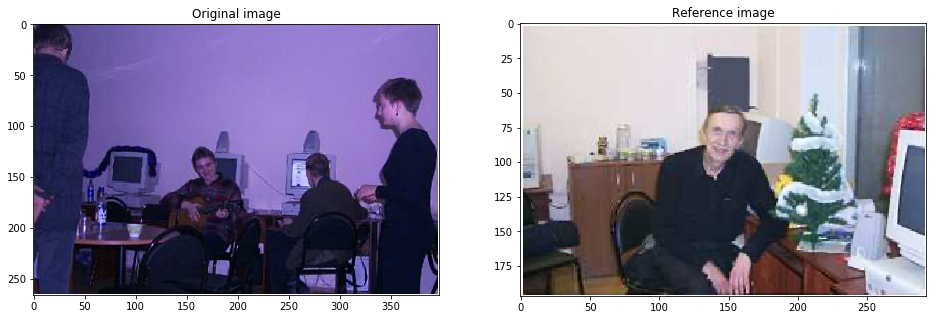

ColorPicker(value='blue', description='Original color')

ColorPicker(value='blue', description='Reference color')

In [6]:
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(ref_image)
plt.title('Reference image')
plt.show()

display(orig_vg)
display(ref_vg)

In [7]:
def hex_to_rgb(hex_color):
    RGB_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return RGB_color

def reference_color(np_img, orig_color, ref_color):
    R_const = ref_color[0] / orig_color[0]
    G_const = ref_color[1] / orig_color[1]
    B_const = ref_color[2] / orig_color[2]

    RGB_const = np.array([R_const, G_const, B_const])    
    scale_img = np.multiply(orig_image, RGB_const)
    
    return normilize_image(scale_img)

In [8]:
orig_hex = orig_vg.value.lstrip('#')
ref_hex = ref_vg.value.lstrip('#')

RGB_orig_color = hex_to_rgb(orig_hex)
RGB_ref_color = hex_to_rgb(ref_hex)

print('Original RGB =', RGB_orig_color)
print('Reference RGB =', RGB_ref_color)

Original RGB = (133, 108, 193)
Reference RGB = (233, 224, 222)


In [9]:
reference_color_img = reference_color(orig_image, RGB_orig_color, RGB_ref_color)

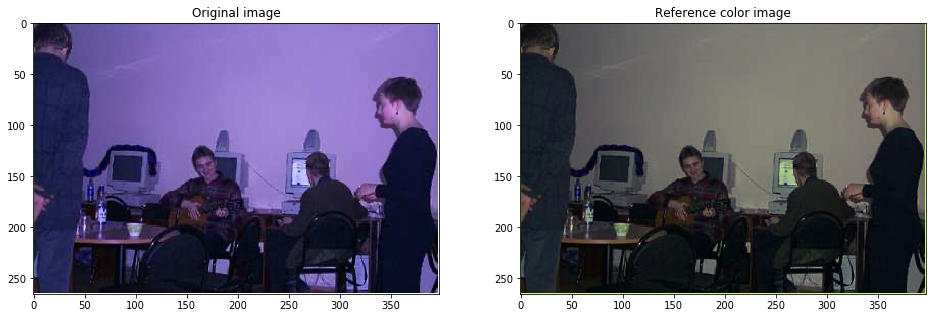

In [10]:
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(reference_color_img)
plt.title('Reference color image')

plt.show()

# Серый мир

In [11]:
def gray_world(np_img):
    r_mean = np.mean(np_img[:,:,0])
    g_mean = np.mean(np_img[:,:,1])
    b_mean = np.mean(np_img[:,:,2])

    avg = (r_mean + g_mean + b_mean) / 3
    
    temp_img = np.copy(np_img)

    for i, c_mean in enumerate([r_mean, g_mean, b_mean]):
        temp_img[:,:,i] = temp_img[:,:,i] * avg / c_mean
    
    return temp_img

In [12]:
gray_world_img = gray_world(orig_image)

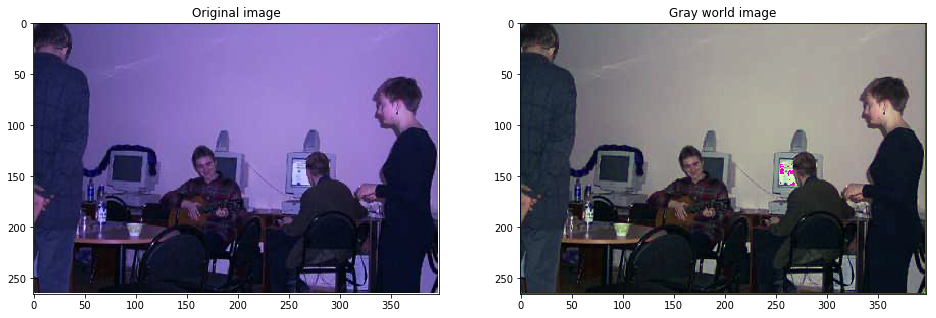

In [13]:
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(gray_world_img)
plt.title('Gray world image')

plt.show()

# Пока не понял, шо делать